In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder

#                                   Please Note
Note: The dataset is synthetic and it's accuracy of the data is not good 
This is because the dataset for this type of project is not available anywhere online

In [2]:
df = pd.read_csv('completed_10th.csv')
df.head(10)

,Maths,General Science,History,Geography,Language,Mean,Gender,Locality,Budget,Major
0,72,72,34,31,74,55.300000,Male,Pune,50000,0
1,69,90,88,70,88,79.533333,Female,Pune,47000,3
2,90,95,73,81,93,83.333333,Female,Pune,4500,2
3,47,57,98,31,44,56.566667,Male,Nashik,23000,2
4,76,78,30,37,75,57.766667,Female,Nashik,45000,3
5,71,83,92,86,78,79.800000,Male,Mumbai,37500,1
6,88,95,46,81,92,76.833333,Male,Nashik,47000,1
7,40,43,79,33,39,49.666667,Female,Nashik,8500,0
8,64,64,90,66,67,68.866667,Female,Nashik,30500,0
9,38,60,77,52,50,57.600000,Female,Pune,8500,1


# Visualizing of Numerical Features

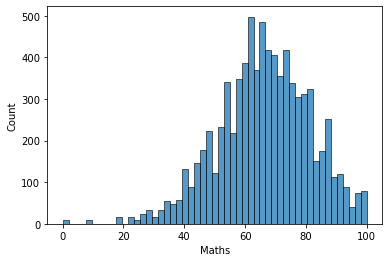

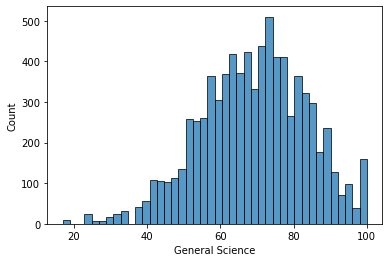

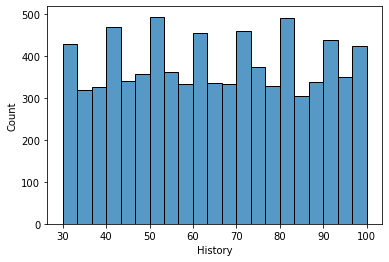

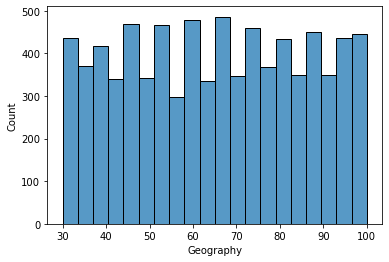

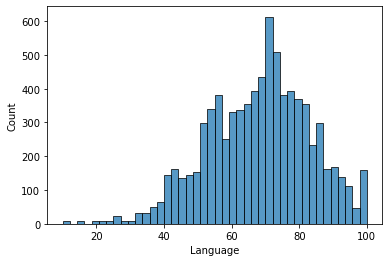

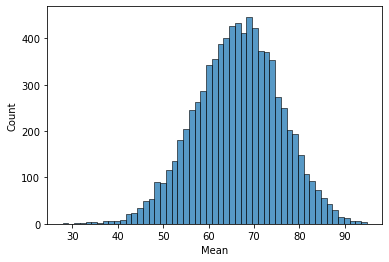

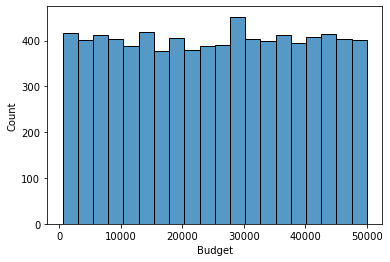

In [3]:
for feature in df.columns:
    if df[feature].dtypes != 'O' and feature != 'Major':
        sns.histplot(x=feature,data=df)
        plt.show()

# Visualizing categorical Features

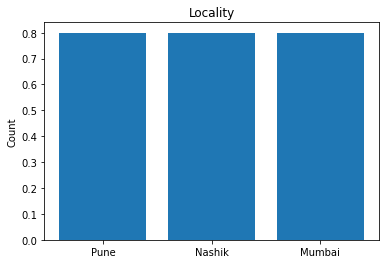

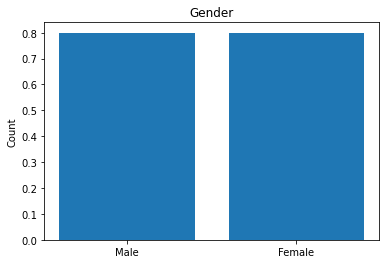

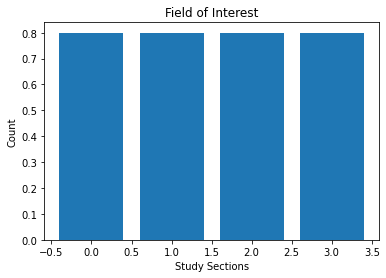

In [4]:
plt.bar(df['Locality'],0.8)
plt.title('Locality')
plt.ylabel('Count')
plt.show()

plt.bar(df['Gender'],0.8)
plt.ylabel('Count')
plt.title('Gender')
plt.show()

plt.bar(df['Major'],0.8)
plt.title('Field of Interest')
plt.xlabel('Study Sections')
plt.ylabel('Count')
plt.show()

# Correlation between Independent Features and Dependent Features

In [5]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Locality'] = le.fit_transform(df['Locality'])
df.head()

,Maths,General Science,History,Geography,Language,Mean,Gender,Locality,Budget,Major
0,72,72,34,31,74,55.300000,1,2,50000,0
1,69,90,88,70,88,79.533333,0,2,47000,3
2,90,95,73,81,93,83.333333,0,2,4500,2
3,47,57,98,31,44,56.566667,1,1,23000,2
4,76,78,30,37,75,57.766667,0,1,45000,3


<AxesSubplot:>

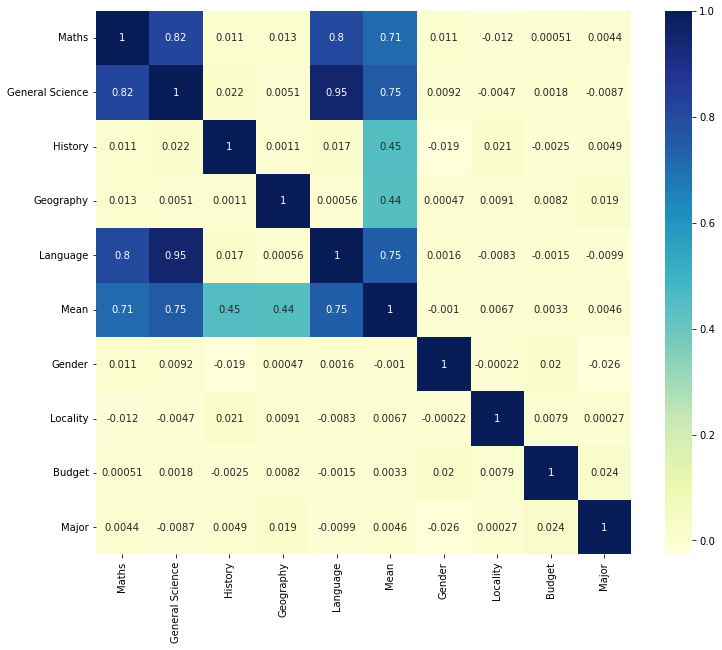

In [6]:
matriz_corr = df.corr()
plt.figure(figsize = (12, 10))
sns.heatmap(matriz_corr, cmap='YlGnBu', annot = True)

# Model Building

In [7]:
X = df[['Maths','General Science','History','Geography','Language','Mean','Gender','Locality','Budget']]
y = df['Major']

scaled_X = StandardScaler()

X = scaled_X.fit_transform(X)
X

array([[ 0.39203539,  0.19581547, -1.52660933, ...,  0.90916397,
         1.21401932,  1.70898457],
       [ 0.19433095,  1.42819277,  1.13993815, ..., -1.0999116 ,
         1.21401932,  1.50159137],
       [ 1.57826204,  1.7705198 ,  0.39923052, ..., -1.0999116 ,
         1.21401932, -1.43647895],
       ...,
       [ 0.06252799, -0.35190777, -0.8352822 , ..., -1.0999116 ,
         1.21401932,  0.94854284],
       [-1.38730458, -2.20047372, -1.52660933, ..., -1.0999116 ,
        -0.01354151,  0.01527344],
       [-0.39878237,  0.19581547, -0.09457457, ...,  0.90916397,
         1.21401932,  1.67441904]])

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state=42)
X_test.shape

(1614, 9)

In [9]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)

In [10]:
models = {"Support Vector Machine":SVC(),
       "DecisionTreeClassifier":DecisionTreeClassifier(),
       "LogisticRegression":LogisticRegression(),
       "XGBClassifier":XGBClassifier(),
       "CatBoostClassifier":CatBoostClassifier(verbose=False),
       "KNeighborsClassifier":KNeighborsClassifier(),
       "AdaBoostClassifier":AdaBoostClassifier(),
       "GradientBoostingClassifier":GradientBoostingClassifier(),
       "RandomForestClassifier":RandomForestClassifier()}

In [11]:
scores = {}
for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    res = accuracy_score(y_pred,y_test)
    scores[name] = res
    
sorted_dict = sorted(scores.items(),key= lambda x:x[1],reverse=True)
sorted_dict

[('Support Vector Machine', 0.29739776951672864),
 ('LogisticRegression', 0.28872366790582404),
 ('AdaBoostClassifier', 0.2862453531598513),
 ('GradientBoostingClassifier', 0.28066914498141265),
 ('RandomForestClassifier', 0.2707558859975217),
 ('KNeighborsClassifier', 0.26332094175960347),
 ('CatBoostClassifier', 0.26270136307311026),
 ('XGBClassifier', 0.2558859975216852),
 ('DecisionTreeClassifier', 0.24721189591078066)]